# CMSE 381 HW2

Due date: 2/10/2023

Katie Pocock

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer



---
<a name=Basics></a>
# Question 1

&#9989;  **<font color=red>2.4.7:</font>**  The table below provides a training data set containing six observations, three predictors, and one qualitative response variable.


In [11]:
from tabulate import tabulate
table = [['Obs.', 'X1', 'X2', 'X3', 'Y'], 
         ['1', '0', '3', '0' ,'Red'], 
         ['2', '2', '0', '0' ,'Red'],
         ['3', '0', '1', '3' ,'Red'],
         ['4', '0', '1', '2' ,'Green'],
         ['5', '-1', '0', '1' ,'Green'],
         ['6', '1', '1', '1' ,'Red']]
print(tabulate(table))


----  --  --  --  -----
Obs.  X1  X2  X3  Y
1     0   3   0   Red
2     2   0   0   Red
3     0   1   3   Red
4     0   1   2   Green
5     -1  0   1   Green
6     1   1   1   Red
----  --  --  --  -----


Suppose we wish to use this data set to make a prediction for Y when X1 = X2 = X3 = 0 using K-nearest neighbors.
- (a) Compute the Euclidean distance between each observation and
the test point, X1 = X2 = X3 = 0.
- (b) What is our prediction with K = 1? Why?
- (c) What is our prediction with K = 3? Why?
- (d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

(a)

In [13]:
from tabulate import tabulate
table = [['Obs.', 'X1', 'X2', 'X3', 'Y', 'Distance','Rank'], 
         ['1', '0', '3', '0' ,'Red','3','5'], 
         ['2', '2', '0', '0' ,'Red','2','3'],
         ['3', '0', '1', '3' ,'Red','3.16','6'],
         ['4', '0', '1', '2' ,'Green','2.23','4'],
         ['5', '-1', '0', '1' ,'Green','1.41','1'],
         ['6', '1', '1', '1' ,'Red','1.73','2']]
print(tabulate(table))


----  --  --  --  -----  --------  ----
Obs.  X1  X2  X3  Y      Distance  Rank
1     0   3   0   Red    3         5
2     2   0   0   Red    2         3
3     0   1   3   Red    3.16      6
4     0   1   2   Green  2.23      4
5     -1  0   1   Green  1.41      1
6     1   1   1   Red    1.73      2
----  --  --  --  -----  --------  ----


(b) Green. Let K=1, then the single nearest neighbor is observation number 5 where Rank=1 with lable Green, So Green is our prediction.

(c) Red. Let K=3, the 3 nearest neighbors are observations number 2, 5 and 6 with lables red, green, red. So since 2/3 are red, we predict red. 

(d)Small. As K increases the boundary becomes inflexible. So we'd expect the best value to be small.


---
<a name=Basics></a>
# Question 2

&#9989;  **<font color=red>3.7.4:</font>**  I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X2 + β3X3 + ϵ.
- (a) Suppose that the true relationship between X and Y is linear,
i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of
squares (RSS) for the linear regression, and also the training
RSS for the cubic regression. Would we expect one to be lower
than the other, would we expect them to be the same, or is there
not enough information to tell? Justify your answer.
- (b) Answer (a) using test rather than training RSS.
- (c) Suppose that the true relationship between X and Y is not linear,
but we don’t know how far it is from linear. Consider the training
RSS for the linear regression, and also the training RSS for the
cubic regression. Would we expect one to be lower than the
other, would we expect them to be the same, or is there not
enough information to tell? Justify your answer.
- (d) Answer (c) using test rather than training RSS

(a) We would expect cubic RSS to be lower than the other. Since the polynomial/cubic  regression will make a tight fit using the data that matched with a wider irreducible error (e), it is tighter than the linear regression therefore it has a lower training RSS.

(b) Using test rather than training RSS means that the polynomial/cubic regression has a higher test RSS. This is to do with the overfit from training that would result in more errors than in the linear regression case. 

(c) We would expect cubic training RSS to be lower than the other. Cubic regression has higher flexibility than linear, so it reduces the training RSS and closely follows the points due to it's flexibility.  

(d) There is not enough information to tell. This si because we don't know how far it is from being linear. By knowing it was close to linear the RSS would be lower than the cubic regression test RSS. But if it is closer to cubic then the test RSS would be lower than linear regression test RSS. Therefore since we do not know how far it is from linear so we do not know what level of flexibility fits it better. 


---
<a name=Basics></a>
# Question 3

&#9989;  **<font color=red>3.7.10 :</font>** This question should be answered using the Carseats data set.
- (a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.
- (b) Provide an interpretation of each coefficient in the model. Be
careful—some of the variables in the model are qualitative!
- (c) Write out the model in equation form, being careful to handle
the qualitative variables properly.
- (d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?
- (e) On the basis of your response to the previous question, fit a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.
- (f) How well do the models in (a) and (e) fit the data?
- (g) Using the model from (e), obtain 95 % confidence intervals for
the coefficient(s).
3.7 Exercises 125
- (h) Is there evidence of outliers or high leverage observations in the
model from (e)?

In [96]:
carseats = pd.read_csv('Carseats.csv')
carseats.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


(a)

In [107]:
import statsmodels.formula.api as smf

features = ' + '.join(['Price', 'Urban', 'US'])

lr = smf.ols(formula=f'Sales ~ {features}', data=carseats).fit()
lr.summary()
#print(features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           2.39e-23
Time:                        17:02:38   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative

 - Urban[Yes] : because of the high p-value of the t-statistic that is based off of the number of sales, and the linear regression, there is no relationship between number of sales and location of store. 

 - US[Yes] : the linear regression shows that there is a relationship between the store being in the US and the amount of sales. by the coefficient we can see there is a positive relationship between sales and USYES so if the store is in the US the sales will increase by about 1201. 

 - Price : because of the low p-value of the t-statistics and the linear regression, this means that there is a relationship between price and sales.  

 - Sales : As sales decreases, price increases. 

(c)Sales = 13.04 − 0.05∗Price − 0.02∗UrbanYes + 1.20∗USYes

(d)The predictors Price and USYes reject the null hypothesis, based on the p-value, F-statistic, and p-value of the F-statistic.

(e) Because the r2 value is so low, neither of the models fit the data well. 


(f) the models in a and e both fit the data similarly which is not very well, based off of the low r2 and RSE of the linear regressions. 


(h) there is not evidence of outliers since the student residuals are bounded in [-3,3]. there is evidence of high leverage in the residual v. leverage plot since multiple points on the graph have high leverage. 


(g)

In [109]:
(lr.conf_int(0.05).rename(columns={0: 'Lower', 1: 'Upper'}))

,Lower,Upper
Intercept,11.763597,14.323341
Urban[T.Yes],-0.555973,0.512141
US[T.Yes],0.691304,1.709841
Price,-0.064764,-0.044154



---
<a name=Basics></a>
# Question 4

&#9989;  **<font color=red>4.8.6:</font>** Suppose we collect data for a group of students in a statistics class
with variables X1 = hours studied, X2 = undergrad GPA, and Y =
receive an A. We fit a logistic regression and produce estimated
coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.
- (a) Estimate the probability that a student who studies for 40 h and
has an undergrad GPA of 3.5 gets an A in the class.
- (b) How many hours would the student in part (a) need to study to
have a 50 % chance of getting an A in the class?

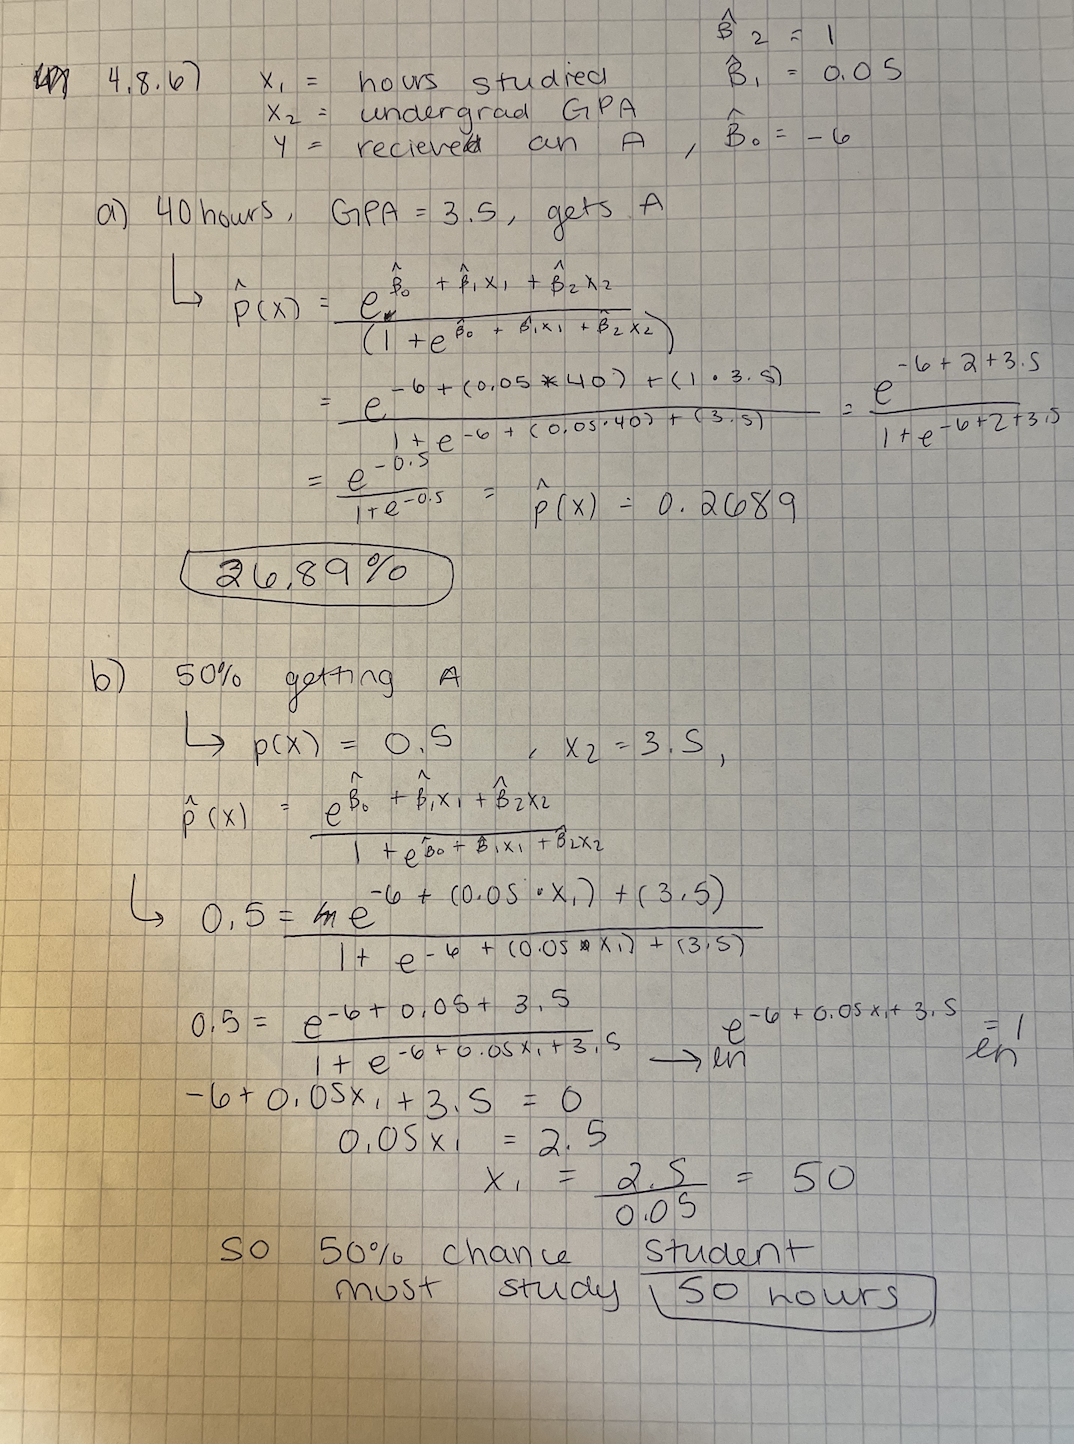

In [94]:
from IPython.display import Image, display;   display(Image(filename='Screenshot 2023-02-10 at 4.49.26 PM.png'))


---
<a name=Basics></a>
# Question 5

&#9989;  **<font color=red>4.8.9:</font>** This problem has to do with odds.
- (a) On average, what fraction of people with an odds of 0.37 of
defaulting on their credit card payment will in fact default?
- (b) Suppose that an individual has a 16 % chance of defaulting on
her credit card payment. What are the odds that she will default?

In [18]:
print(0.37/(1+0.37))

print(0.16/(1-0.16))

0.27007299270072993
0.1904761904761905


(a) the fraction of people with such odds that will in fact default are 27%

(b) the odds that she will default are at 19.05%


---
<a name=Basics></a>
# Question 6

&#9989;  **<font color=red>4.8.12:</font>** Suppose that you wish to classify an observation X ∈ R into apples
and oranges. You fit a logistic regression model and find that
Prˆ(Y = orange|X = x) = exp(βˆ0 + βˆ1x)/(1 + exp(βˆ0 + βˆ1x))
.
Your friend fits a logistic regression model to the same data using the
softmax formulation in (4.13), and finds that
Prˆ(Y = orange|X = x) = exp(ˆαorange0 + ˆαorange1x)/(exp(ˆαorange0 + ˆαorange1x) + exp( ˆαapple0 + ˆαapple1x))
.
- (a) What is the log odds of orange versus apple in your model?
- (b) What is the log odds of orange versus apple in your friend’s
model?
- (c) Suppose that in your model, βˆ0 = 2 and βˆ1 = −1. What are
the coefficient estimates in your friend’s model? Be as specific
as possible.
4.8 Exercises 193
- (d) Now suppose that you and your friend fit the same two models
on a different data set. This time, your friend gets the coefficient
estimates ˆαorange0 = 1.2, ˆαorange1 = −2, ˆαapple0 = 3, ˆαapple1 =
0.6. What are the coefficient estimates in your model?
- (e) Finally, suppose you apply both models from (d) to a data set
with 2,000 test observations. What fraction of the time do you
expect the predicted class labels from your model to agree with
those from your friend’s model? Explain your answer.

(a) the log odds of orange vs. apple in my model is logodds(Prˆ(Y=(orange)∣X=x))=β̂0+β̂1x. Found by takign the log of the odds given by the formula for pr^orange. This is a simple binary classification and all other possible odds if not orange is apple. 

(b)the log odds of orange vs. apple in my friend's model is logodds((Prˆ(Y=(orange)∣X=x)/Prˆ(Y=(apple)∣X=x)))= α̂*orange0 + α̂*orange1(x) − α̂*apple0 − α̂*apple1(x). Found by dividing odds of oranges by apples, due to the softmax process. then taking the log of said odds resulting in answer. 


(c)
β̂0 = α̂*orange0 − α̂*apple0 
β̂1= α̂ orange1 −α̂ apple1 

(d)
β̂0 = 1.5−3.6 = −2.1
β̂1 = −2.4−0.8 = −3.2

(e) The fraction that I would expect the predictied class labels from my model to agree with my friend's model would be 2000/2000 of the time, so 100% of the time. Since each of the models pedict the same thing, the non-softmax log odds can be used the gaurauntee that they're equivalent therefore equal predictions would be the outcome for a dataset with 2,000 test observations. 



---
<a name=Basics></a>
# Question 7

&#9989;  **<font color=red>5.4.5:</font>** In Chapter 4, we used logistic regression to predict the probability of
default using income and balance on the Default data set. We will
now estimate the test error of this logistic regression model using the
validation set approach. Do not forget to set a random seed before
beginning your analysis.
- (a) Fit a logistic regression model that uses income and balance to
predict default.
5.4 Exercises 221
- (b) Using the validation set approach, estimate the test error of this
model. In order to do this, you must perform the following steps:
   - i. Split the sample set into a training set and a validation set.
   - ii. Fit a multiple logistic regression model using only the training observations.
   - iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.
   - iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassified.
- (c) Repeat the process in (b) three times, using three different splits
of the observations into a training set and a validation set. Comment on the results obtained.
- (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable
for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a
dummy variable for student leads to a reduction in the test error
rate.

In [80]:
default = pd.read_csv('Default.csv')
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


(a)

In [81]:
X = default[["balance", "income"]]
y = default["default"]
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X, y)
clf.coef_

array([[5.64710291e-03, 2.08089921e-05]])

(b) test error = 2.84%

In [82]:
X_train, X_validation, y_train, y_validation = train_test_split(default[["balance", "income"]], default["default"],
                                                   test_size = 0.25, random_state = 312) 

clf = LogisticRegression(penalty = "none", solver = "lbfgs") 
clf.fit(X_train, y_train)

1 - clf.score(X_validation, y_validation) 

0.02839999999999998

(c) using a observation number of 527 I got 3.234%. using a observation number of 998 I got 3.44%. using a much greater observation number of 244173 I got 2.96%. Which means that as I kept the test and training sizes the same,the validation set error stays at about the same value. In the case where I used a very large observation number it is the minimum percentage value estimated.  The average of the test errors is only about 5% less than the error from using the naive strategy.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(default[["balance", "income"]], default["default"],
                                                   test_size = 0.25, random_state = 527)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)

1 - clf.score(X_test, y_test)

0.032399999999999984

In [84]:
X_train, X_test, y_train, y_test = train_test_split(default[["balance", "income"]], default["default"],
                                                   test_size = 0.25, random_state = 998)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)

1 - clf.score(X_test, y_test)

0.034399999999999986

In [85]:
X_train, X_test, y_train, y_test = train_test_split(default[["balance", "income"]], default["default"],
                                                   test_size = 0.25, random_state = 244173)
clf = LogisticRegression(penalty = "none", solver = "lbfgs")
clf.fit(X_train, y_train)

1 - clf.score(X_test, y_test)

0.02959999999999996

In [86]:
(default["default"] != "No").mean()

0.0333

(d)Considering a logistic regression model predicting probability of default based off of balance, income, and dummy variable for student, the test error for the model using a validation set approach, we can see that on average including a dummy variable for the students doesn't lead to a lower test error rate. On average tehre actually is a small increase in the test error rate.

In [89]:
np.random.seed(465)
with_stu = {}
without_stu = {}

categorical_features = ["student"]
categorical_transformer = Pipeline([("onehot", OneHotEncoder(drop = "first"))])
numerical_features = ["income", "balance"]

with_stu_p = ColumnTransformer([("cat", categorical_transformer, categorical_features),
                                 ("num", "passthrough", numerical_features)])

with_stu_clf = Pipeline([("preprocessor", with_stu_p), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])

without_stu_p = ColumnTransformer([("num", "passthrough", numerical_features)])

without_stu_clf = Pipeline([("preprocessor", without_stu_p), 
                ("classifier", LogisticRegression(penalty = "none", solver = "lbfgs"))])
# with_stu_p
# without_stu_p

In [90]:
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(default, default["default"], test_size = 0.25)

    with_stu_clf.fit(X_train, y_train)
    with_stu[i] = 1 - with_stu_clf.score(X_test, y_test)

    without_stu_clf.fit(X_train, y_train)
    without_stu[i] = 1 - without_stu_clf.score(X_test, y_test)
    
errors = pd.DataFrame({"with_student": with_stu, "without_student": without_stu})
errors["difference"] = errors["with_student"] - errors["without_student"]
errors["difference"].mean()

0.0033119999999999972


---
<a name=Basics></a>
# Question 8

&#9989;  **<font color=red>5.4.8:</font>** We will now perform cross-validation on a simulated data set.
- (a) Generate a simulated data set as follows:
    - set.seed (1)
    - x <- rnorm (100)
    - y <- x - 2 * x^2 + rnorm (100)
In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.
- (b) Create a scatterplot of X against Y . Comment on what you find.
- (c) Set a random seed, and then compute the LOOCV errors that
result from fitting the following four models using least squares:
5.4 Exercises 223
  - i. Y = β0 + β1X + ϵ
  - ii. Y = β0 + β1X + β2X2 + ϵ
  - iii. Y = β0 + β1X + β2X2 + β3X3 + ϵ
  - iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ϵ.
Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .
- (d) Repeat (c) using another random seed, and report your results.
Are your results the same as what you got in (c)? Why?
- (e) Which of the models in (c) had the smallest LOOCV error? Is
this what you expected? Explain your answer.
- (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?



Along with the problems listed in the textbook, do the following. Repeat part (c) using k-fold CV for k = 5, 10, 15, 20. Plot your results for error vs degree for all these plus the LOOCV version. What do you notice?

https://hastie.su.domains/ISLR2/ISLRv2_website.pdf
https://hastie.su.domains/ISLR2/ISLRv2_website.pdf

(a)

n =100, p=2. the model used to generate the data in the equation form:
Y = X - 2X^2 + ε

In [8]:
import random
random.seed(1)
y = np.random.normal(size = 100) 
x = np.random.normal(size = 100) 
error = np.random.normal(size = 100)
y = x - 2*(x**2) + error 

(b) there is a curved relationship in our scatter. 

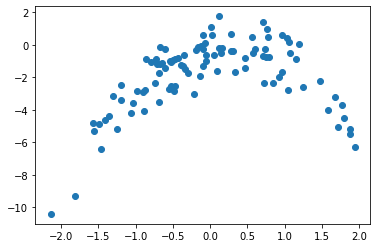

In [9]:
plt.scatter(x,y)

(c)

In [38]:
#sm.GLM?
from sklearn.linear_model import LinearRegression

def LOOCV(df):
    n = len(df)
    error = 0.0

    for i in range(n):
        test = df.iloc[[i]]
        train = df.drop(df.index[i])

        X_ = train.loc[:, train.columns != 'y']
        y_ = train['y']

        model = LinearRegression(fit_intercept=True)
        model.fit (X_, y_)

        X_ = test.loc[:, df.columns != 'y']
        predictions = model.predict(X_)
        error += (predictions - test.iloc[0]['y'])**2

    return (error/n)


In [44]:
random.seed(1)

mod1 = pd.DataFrame({'x':x, 'y':y})
print("The MSE for Model 1 is ", LOOCV(mod1))

mod2 = pd.DataFrame({'x':x, 'x2':x**2, 'y':y})
print("The MSE for Model 2 is ", LOOCV(mod2))

mod3 = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'y':y})
print("The MSE for Model 3 is ", LOOCV(mod3))

mod4 = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})
print("The MSE for Model 4 is ", LOOCV(mod4))

The MSE for Model 1 is  [4.5400151]
The MSE for Model 2 is  [1.03412592]
The MSE for Model 3 is  [1.05006268]
The MSE for Model 4 is  [1.04313677]


(d) i got the same results that i did in c. This is because LOOCV evaluates n folds of each observation

In [45]:
random.seed(4)
# Model 1
mod1 = pd.DataFrame({'x':x, 'y':y})
print("The MSE for Model 1 is ", LOOCV(mod1))

mod2 = pd.DataFrame({'x':x, 'x2':x**2, 'y':y})
print("The MSE for Model 2 is ", LOOCV(mod2))

mod3 = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'y':y})
print("The MSE for Model 3 is ", LOOCV(mod3))

mod4 = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})
print("The MSE for Model 4 is ", LOOCV(mod4))

The MSE for Model 1 is  [4.5400151]
The MSE for Model 2 is  [1.03412592]
The MSE for Model 3 is  [1.05006268]
The MSE for Model 4 is  [1.04313677]


(e) model 2 has the lowest LOOCV error. this is not surprising because a and y are quadratic (from b).  

(f) The p-values printed below show that both the linear and quadratic terms are significant. the cubic and 4th degree are not significant. this agrees with the conclusions drawn from the cross validation. 


In [36]:
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})

X_ = df.loc[:, df.columns != 'y']
X_ = sm.add_constant(X_, prepend=True)
y_ = df['y']

model = sm.OLS(y_, X_)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     93.25
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           4.95e-32
Time:                        13:51:55   Log-Likelihood:                -138.01
No. Observations:                 100   AIC:                             286.0
Df Residuals:                      95   BIC:                             299.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4805      0.159     -3.027      0.0